# Useful websites for PCA and Linear Algebra

I highly recommend this youtube channel if you are curious about the mathematics. He has multiple series about different topics like and explains them in an amazingly intuitive manner: [3B1B](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw/playlists?view=50&sort=dd&shelf_id=20)

This tutorial on PCA does a good job of explaining the math behind the method: [PCA](https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8)

# Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os, glob, fnmatch
import matplotlib.image as mpimg 


## Review of Finding Files and Functions

In [2]:
# Creates a function to find file of a given type in a path and recursively searches subfolders
def find(pattern, path):
    result = [] # initialize the list as empty
    for root, dirs, files in os.walk(path): # walk though the path directory, and files
        for name in files:  # walk to the file in the directory
            if fnmatch.fnmatch(name,pattern):  # if the file matches the filetype append to list
                result.append(os.path.join(root,name)) 
    return result # return full list of file of a given type

In [3]:
source_path = r'./discussion4files'  # Exmaple source path to search : './Teaching/NewLessons/Lesson2Files' where the . means current folder
filetype = '*.jpg' # Desired file type to find.  * token enables arbitrary string before the star. 
fname = sorted(find(filetype,source_path))
fname

['./discussion4files/.ipynb_checkpoints/Example1-checkpoint.jpg',
 './discussion4files/Example1.jpg']

## Linear Algebra Primer

In [4]:
# Vectors
x = np.array([[1],[0]])
print('x = \n', x)
print('x dims: ', x.shape,'\n')
y = np.array([[0],[1]])
print('y = \n', y.T)
print('y dims: ', y.T.shape)

x = 
 [[1]
 [0]]
x dims:  (2, 1) 

y = 
 [[0 1]]
y dims:  (1, 2)


In [5]:
# Example of Transpose
print(x)
print('x Transpose:', x.T) # the .T designates transpose

[[1]
 [0]]
x Transpose: [[1 0]]


In [6]:
# Scalar Multiplication
print(2*x,'\n')

# Vector Addition
print(x + y)

[[2]
 [0]] 

[[1]
 [1]]


In [7]:
x = np.array([[4],[1]])

y = np.array([[2],[-1]])

# Dot Products
# First method
print(np.dot(x.T,y))
# Second Method through transpose and mat mult.
print(x.T@y)
# Dot product as the |x||y|cos(theta) finding similarity by finding theta. 
print(np.arccos(x.T@y/(np.linalg.norm(x)*np.linalg.norm(y)))) #Theta in radians


[[7]]
[[7]]
[[0.70862627]]


In [8]:
# Matricies
A = np.array([[0,-1],[1,0]])
print(A.shape)

B = np.array([[-1,0],[0,-1]])
print(B.shape)

ihat = np.array([[1],[0]])

# Matrix multiplication is denoted by the @ symbol
y = A@ihat
print(y)
z = B@ihat

(2, 2)
(2, 2)
[[0]
 [1]]


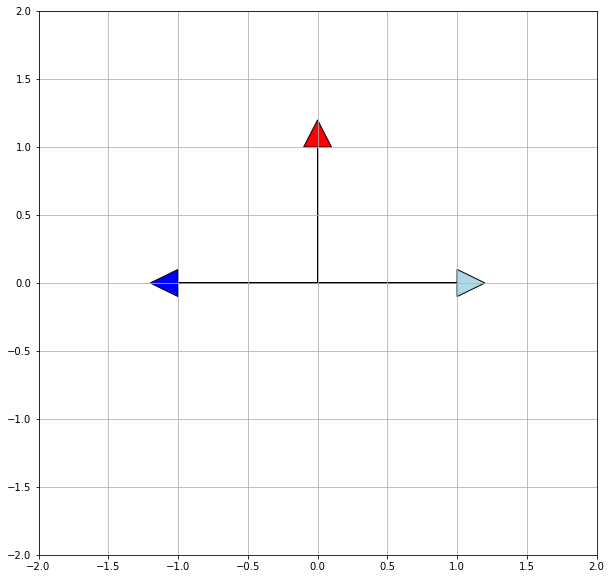

In [9]:
# Graphical representation of matrix vector multiplication
fig,ax = plt.subplots(1,figsize=(10,10))

ax.arrow(0,0,ihat[0,0],ihat[1,0], head_width=0.2, head_length=0.2, fc='lightblue', ec='black',label='ihat')
ax.arrow(0,0,y[0,0],y[1,0], head_width=0.2, head_length=0.2, fc='red', ec='black',label='y')
ax.arrow(0,0,z[0,0],z[1,0], head_width=0.2, head_length=0.2, fc='blue', ec='black',label='z')

plt.grid()

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.show()


In [12]:
# Matrix multiplication
print(A,'\n\n', B)
A@B

[[ 0.44265185  0.05941422]
 [-0.31831698 -0.36482168]
 [ 0.1999762  -0.03200938]
 ...
 [-0.95856485 -0.09716346]
 [ 0.11825454  0.17011514]
 [-1.41306059 -0.33074795]] 

 [[-1  0]
 [ 0 -1]]


array([[-0.44265185, -0.05941422],
       [ 0.31831698,  0.36482168],
       [-0.1999762 ,  0.03200938],
       ...,
       [ 0.95856485,  0.09716346],
       [-0.11825454, -0.17011514],
       [ 1.41306059,  0.33074795]])

In [14]:
# Matrix Multiplication is Associative 
print((A@B)@ihat)
print(A@(B@ihat))

# Matrix Multiplaction is not Communative
C = np.array([[5,-1],[1,-2]])
D = np.array([[0,3],[-4,3]])
print(D@C)
print(C@D)

[[-0.44265185]
 [ 0.31831698]
 [-0.1999762 ]
 ...
 [ 0.95856485]
 [-0.11825454]
 [ 1.41306059]]
[[-0.44265185]
 [ 0.31831698]
 [-0.1999762 ]
 ...
 [ 0.95856485]
 [-0.11825454]
 [ 1.41306059]]
[[  3  -6]
 [-17  -2]]
[[ 4 12]
 [ 8 -3]]


In [15]:
# Determinant 
print(np.linalg.det(D))
print(0*3+3*-4)

12.0
-12


In [16]:
# System of Linear Equations
E = np.array([[2,5,3],[4,0,8],[1,3,0]])
v = np.array([[-3],[0],[2]])

E_inv = np.linalg.inv(E)
print(E_inv)
x = E_inv@v
print(x)

# the inverse of matrix exists if det(E) != 0

[[-0.85714286  0.32142857  1.42857143]
 [ 0.28571429 -0.10714286 -0.14285714]
 [ 0.42857143 -0.03571429 -0.71428571]]
[[ 5.42857143]
 [-1.14285714]
 [-2.71428571]]


# Eigenvectors and Eigenvalues

In [17]:
Rot = np.array([[0,-1],[1,0]])
A = np.array([[3,1],[0,2]])

lam, v = np.linalg.eig(A)

ihat = np.array([[1],[0]])
jhat = np.array([[0],[1]])

v

array([[ 1.        , -0.70710678],
       [ 0.        ,  0.70710678]])

In [ ]:
# Graphical representation of Eigenvalues
fig,ax = plt.subplots(1,figsize=(10,10))


ax.arrow(0,0,v[0,0],v[1,0], head_width=0.2, head_length=0.2, fc='red', ec='black',label='y')
ax.arrow(0,0,v[0,1],v[1,1], head_width=0.2, head_length=0.2, fc='blue', ec='black',label='z')

# Plot ihat and jhat last so they go on top of the transformed vectors
ax.arrow(0,0,ihat[0,0],ihat[1,0], head_width=0.1, head_length=0.1, fc='black', ec='black',label='ihat')
ax.arrow(0,0,jhat[0,0],jhat[1,0], head_width=0.1, head_length=0.1, fc='black', ec='black',label='ihat')
plt.plot(np.linspace(-2,2,100),np.linspace(2,-2,100),'b-')
plt.plot(np.linspace(-2,2,100),np.zeros((100)),'r-')

plt.grid()

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.show()


# Example of PCA

In [10]:
def pca(X):
    # Data matrix X, assumes 0-centered
    n, m = X.shape
    # Compute covariance matrix
    C = np.dot(X.T, X) / (n-1)
    # Eigen decomposition
    eigen_vals, eigen_vecs = np.linalg.eig(C)
    # Project X onto PC space
    X_pca = np.dot(X, eigen_vecs)
    return X_pca,eigen_vecs

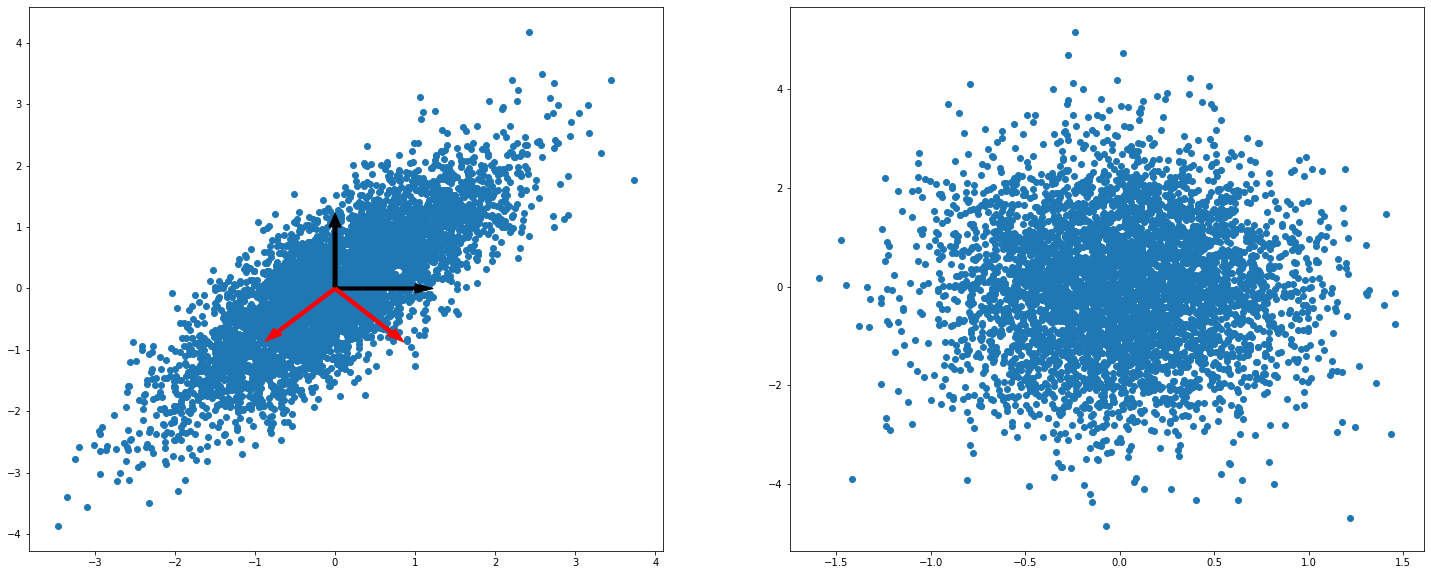

In [11]:
mean = [0, 0]
cov = [[1, .8], [.8, 1]]  # diagonal covariance

# Create a 2D Gaussian distribution that is rotated
x, y = np.random.multivariate_normal(mean, cov, 5000).T


A = np.concatenate((x[:,np.newaxis],y[:,np.newaxis]),axis=1)
A = A-np.mean(A,axis=0)
xproj, V = pca(A)
fig, ax = plt.subplots(1,2, figsize=(25,10))

ax[0].scatter(x,y)
ax[0].arrow(0,0,1,0,color='k', width=.05) # Arrow representing ihat
ax[0].arrow(0,0,0,1,color='k', width=.05) # Arrow representing jhat
ax[0].arrow(0,0,V[1,0],V[1,1],color='r', width=.05) # Draw new arrows corresponding to the eigenvectors 
ax[0].arrow(0,0,V[0,0],V[0,1],color='r', width=.05) # Draw new arrows corresponding to the eigenvectors 
ax[1].scatter(xproj[:,0],xproj[:,1])


# Example of Singular Value Decomposition

In [ ]:
mean = [0, 0]
cov = [[1, .8], [.8, 1]]  # diagonal covariance

# Create a 2D Gaussian distribution that is rotated
x, y = np.random.multivariate_normal(mean, cov, 5000).T
# Create Subplots 
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].scatter(x, y,c='b') # plot the 2D gaussian
ax[0].arrow(0,0,1,0,color='r', width=.05) # Arrow representing ihat
ax[0].arrow(0,0,0,1,color='g', width=.05) # Arrow representing jhat
ax[0].axis('equal') # make the axes equal
ax[0].grid() # Add Grid lines

A = np.vstack((x,y)).T # Create a matrix out of the x and y points that make up the 2D Gaussian 
U,S,V = np.linalg.svd(A,full_matrices=False)  # Run the SVD
ax[1].scatter(x, y,c='b')  # Plot the same points as above on new subplot
ax[1].arrow(0,0,V[1,0],V[1,1],color='r', width=.05) # Draw new arrows corresponding to the eigenvectors 
ax[1].arrow(0,0,V[0,0],V[0,1],color='g', width=.05) # Draw new arrows corresponding to the eigenvectors 
ax[1].axis('equal') # make the axes equal
ax[1].grid() # add Grid lines

plt.show()

In [ ]:
# Example of SVD:  Data Compression
image_path = fname[0] # Grab image path based on the function we created above
image = mpimg.imread(image_path,0) # Load in the image with opencv (cv2).  The 0 means import as gray scale image
plt.figure(figsize=(10,10)) # Create a figure to view the image
plt.imshow(image,cmap='gray') # Show the image in grayscale.  cmap is the color map argument we are setting to 'gray'
plt.show()

In [ ]:
U,S,V = np.linalg.svd(image[:,:,0],full_matrices=False) # Run the SVD
S_mat = np.diag(S) # Make a diagonal matrix out of the singular values

print(U.shape,S.shape,V.shape) # print the shapes of the U S, and V arrays

# Visualize the magnitude of the singular values to gauge how many to use
plt.figure(figsize=(10,10)) 
plt.plot(S)
plt.show()

In [ ]:
# Reconstructing the image with a subset of singular values components

vals = [1,2,3,10,20,50] # A list of the number of singular values to use 
fig, ax = plt.subplots(2,3,figsize=(20,10)) # create 6 subplots, the number of values we chose
for axs, n in zip(np.ndenumerate(ax),vals): # Running a for loop over the axes and enumerating them to keep track of location in list
    B = U[:,:n]@S_mat[:n,:n]@V[:n,:] # Calculating the reconstruction
    axs[1].imshow(B,cmap='gray') # Visualizing the Reconstruction 
    axs[1].set_title('{} Singular Values Used'.format(n)) # Adding title to show how many components used